# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Performing exploratory data analysis will help find answers to questions that will help the company to improve the business. 

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# Reading the data
df = pd.read_csv('foodhub_order.csv')
# Viewing the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
df.shape # returns # of rows, # of columns

(1898, 9)

There are 1898 rows and 9 columns in our dataset.


In [4]:
print(df.dtypes) # prints value datatypes
print('-'*50)
print(df.info()) # prints count of non-null values in each attribute, followed by dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   deliver

Ratings exist as an ordinal nominal value but carry the datatype 'object' due to the value 'Not given' existing in the column alongisde integers.


### Exploring Missing Values

In [5]:
df.isnull().sum() # aggregates null/missing values in each column and returns the sum

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

The result here returns '0' for each column, therefore we can be confident there aren't any null values or missing data, but this does not mean the data is complete. We will explore the "Not Given" values from 'rating'.


### Statistical Summary

In [6]:
df.describe(include = 'all').T # returns statistic 5-number summary for numeric values. include = 'all' argument includes nominal variables. 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


**Order costs** range from 4.47-35.41 dollars with an average order of $16.49.

**Food prep time** ranges from 20-35 minutes with an average duration of 27.37 minutes.

**Delivery time** ranges from 15-33 minutes with an average duration of 24.16 minutes.

### How many orders are not rated?

In [7]:
print('Unique values in column: ', df.rating.nunique()) # returns the number of unique values in the rating column.
print('-'*50)
print('Unique value counts: ')
print(df.rating.value_counts()) # returns the values and their counts from the rating column.
print('-'*50)
print('Total number of entries: ', df.rating.value_counts().sum()) # returns the sum of all value counts.
print('-'*50)
print('Total orders not rated: ', df[df.rating == 'Not given'].value_counts().sum()) # returns the sum of all value counts, excluding the value 'Not given'. 


Unique values in column:  4
--------------------------------------------------
Unique value counts: 
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
--------------------------------------------------
Total number of entries:  1898
--------------------------------------------------
Total orders not rated:  736


We can see that there are 736 instances where there wasn't a rating. There are 588 entries for a rating of 5, 386 entries for a rating of 4, and 188 entries for a rating of 3. This also shows us that there aren't currently any ratings below a 3. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [8]:
df.dtypes # datatypes reminder

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [9]:
# printting strings returning the number of unique values from id and nominal columns.

print('Total unique order_id: ', df.order_id.nunique())
print('Total unique customer_id: ', df.customer_id.nunique())
print('Total unique restaurant_name: ', df.restaurant_name.nunique())
print('Total unique cuisine_type: ', df.cuisine_type.nunique())
print('Total unique day_of_the_week: ', df.day_of_the_week.nunique())

Total unique order_id:  1898
Total unique customer_id:  1200
Total unique restaurant_name:  178
Total unique cuisine_type:  14
Total unique day_of_the_week:  2


Each order has its own unique id.
There are 1200 unique customer ids, meaning some customers in the dataset have placed more than one order.
Food was ordered from 178 different restaurants, each of which falls under one of fourteen cuisine_types.

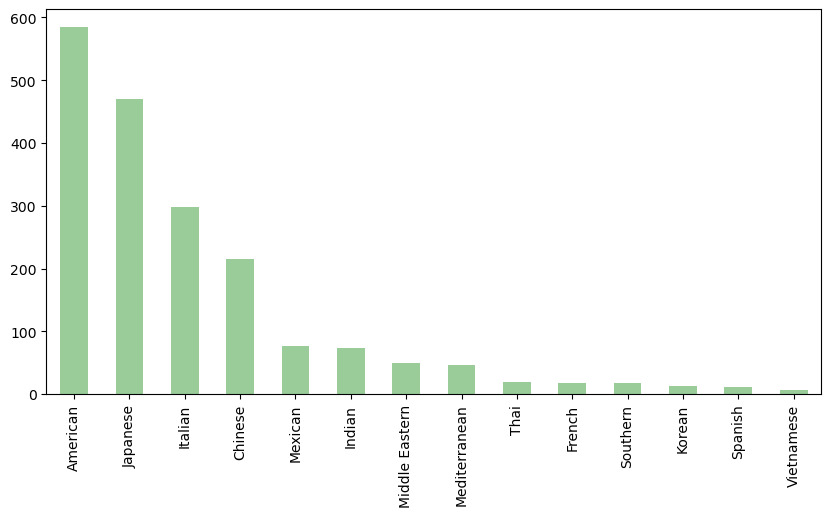

In [10]:
plt.figure(figsize = (10,5))
df['cuisine_type'].value_counts().plot(kind="bar", color = 'green', alpha = .4) # returns a bar plot with values sorted from highest to lowest.
plt.show()

We can see a popularity comparison of cuisine types with American, Japanese, Italian, and Chinese as the top 4. 
Vietnamese food is the least popular.

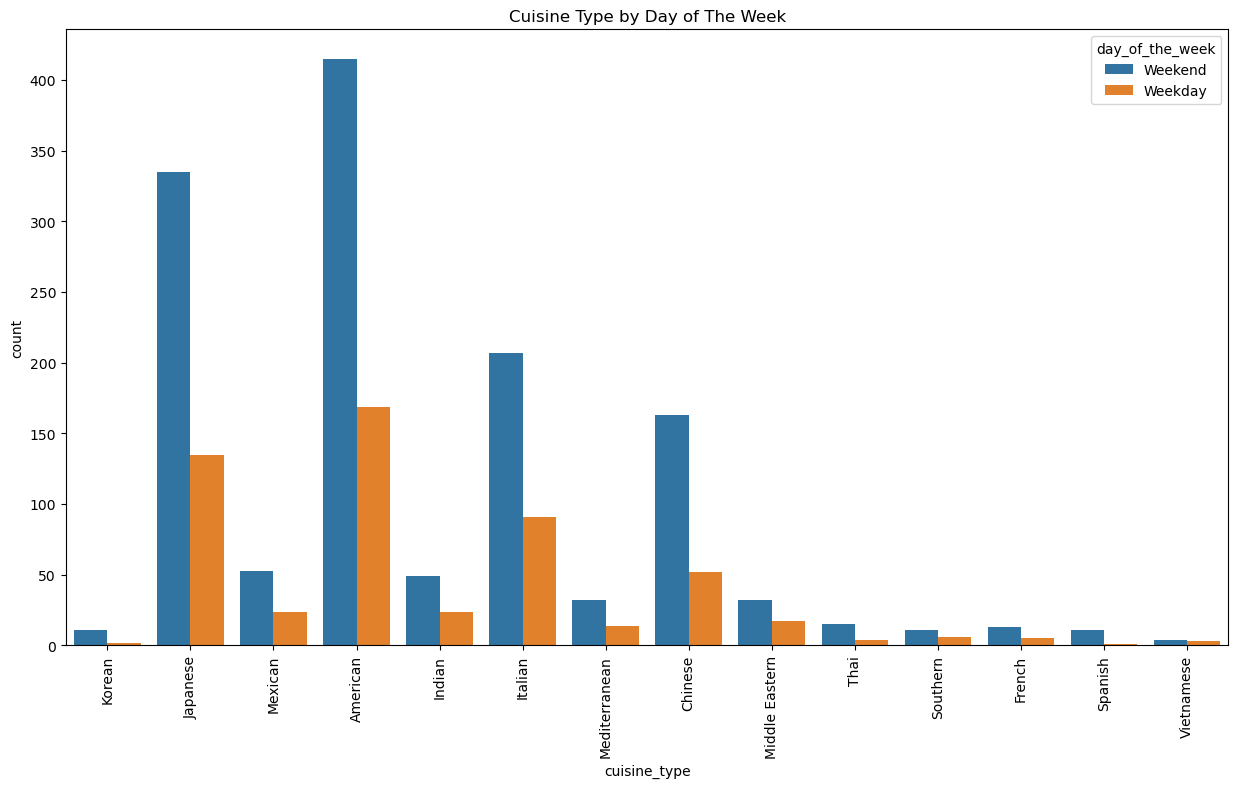

In [11]:
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week') # groups cuisine types and separates them by day of the week.
plt.xticks(rotation = 90) # rotates the x-axis values vertically.
plt.title('Cuisine Type by Day of The Week')
plt.show()

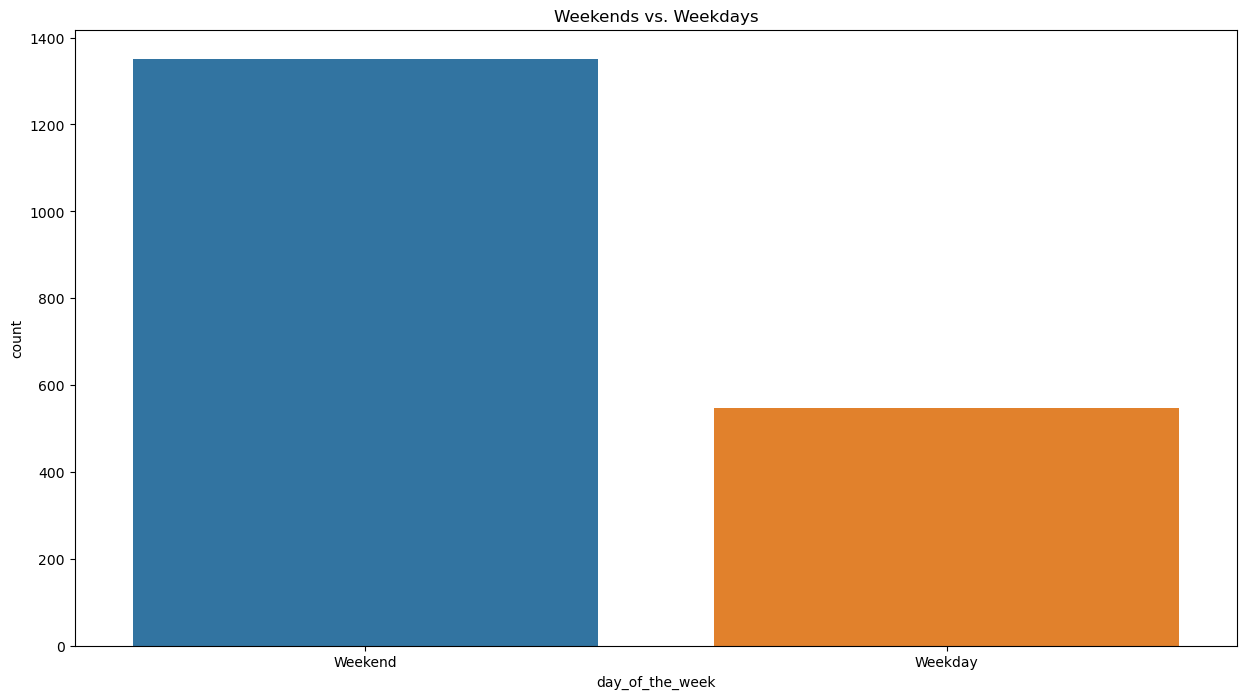

In [12]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df, x = 'day_of_the_week')
plt.title('Weekends vs. Weekdays')
plt.show()

In [13]:
# calculate proportions of weekend and weekday orders

weekend = df[df['day_of_the_week'] == 'Weekend'] # selecting 'Weekend' value from column.
weekday = df[df['day_of_the_week'] == 'Weekday'] # selecting 'Weekday' value from column.
total = df['day_of_the_week'].value_counts().sum()

weekend_perc = weekend.value_counts().sum() / total * 100 # calculate proportion for weekends.
print('Weekends account for ', round(weekend_perc,2), '% of orders.')
print('-'*50)
weekday_perc = weekday.value_counts().sum() / total * 100 # calculate proportion for weekdays
print('Weekdays account for ', round(weekday_perc,2), '% of orders.')

Weekends account for  71.18 % of orders.
--------------------------------------------------
Weekdays account for  28.82 % of orders.


Visualization of Day of The Week, shows weekends make up more than 2/3rds of the orders and are more popular than Weekdays according to this dataset.

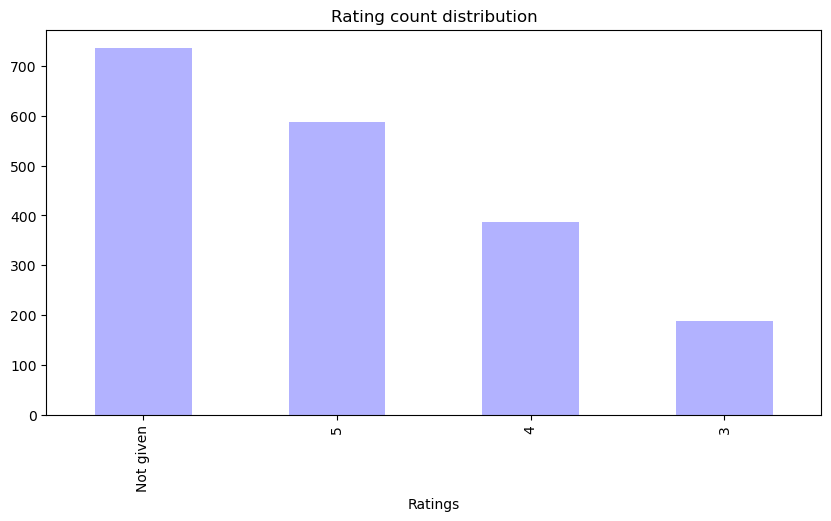

In [14]:
plt.figure(figsize = (10,5))
df['rating'].value_counts().plot(kind ='bar', color = 'blue', alpha = .3)
plt.title('Rating count distribution')
plt.xlabel('Ratings')
plt.show()

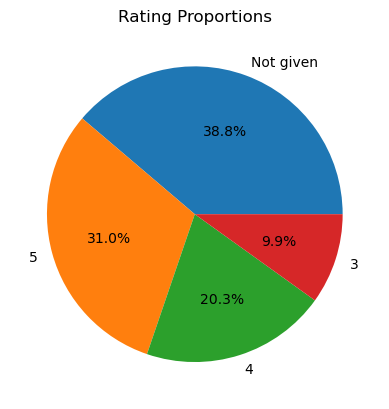

In [15]:
plt.pie(df.rating.value_counts(), autopct = '%.1f%%', radius = 1, labels = ('Not given', '5', '4', '3')) # creates pie chart with proportions of each rating.
plt.title('Rating Proportions')
plt.show()


Customers most commonly failed to provide a rating, or gave the highest possible rating of 5. We do not consider a rating of 'Not given' as a 0 rating.
There aren't any customers in the dataset that gave an order lower than 3.

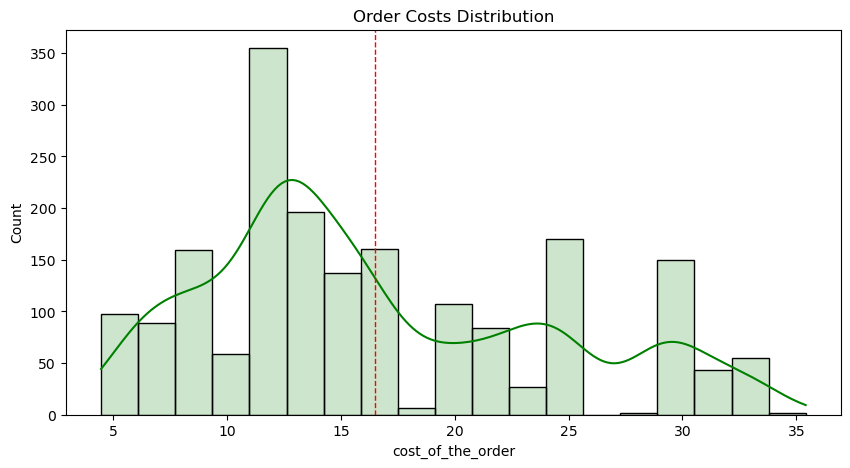

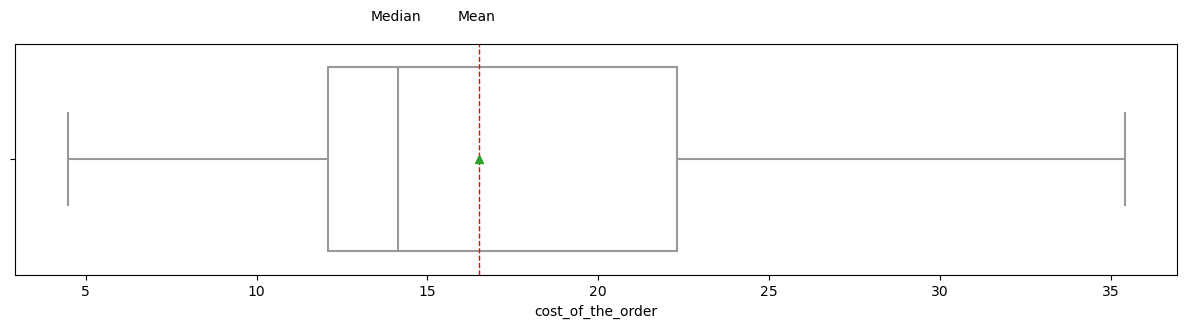

In [16]:
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'cost_of_the_order', kde = True, color = 'green', alpha = .2) # creates histogram including kernal density estimate line
plt.axvline(df['cost_of_the_order'].mean(), color = 'red', linestyle = 'dashed', linewidth = 1) # adds a visible mean identifying line
plt.title('Order Costs Distribution')
plt.show()

plt.figure(figsize = (15,3))
sns.boxplot(data = df, x = 'cost_of_the_order', showmeans = True, color = 'white') # creates a boxplot including means
plt.axvline(df['cost_of_the_order'].mean(), color = 'red', linestyle = 'dashed', linewidth = 1) # adds a more visible mean id line
plt.text(x = df['cost_of_the_order'].mean() - .6, y = -.6, s ='Mean') # adds 'Mean' text label
plt.text(x = df['cost_of_the_order'].median() - .8, y = -.6, s ='Median') # adds 'Median' text label


plt.show()

In [17]:
print('The median value of Order Costs is: ',df['cost_of_the_order'].median()) # prints median
print('-'*50)
print('The mean value of Order Costs is: ',df['cost_of_the_order'].mean()) # prints mean

The median value of Order Costs is:  14.14
--------------------------------------------------
The mean value of Order Costs is:  16.498851422550082


We see our distribution for Order Costs is right skewed.

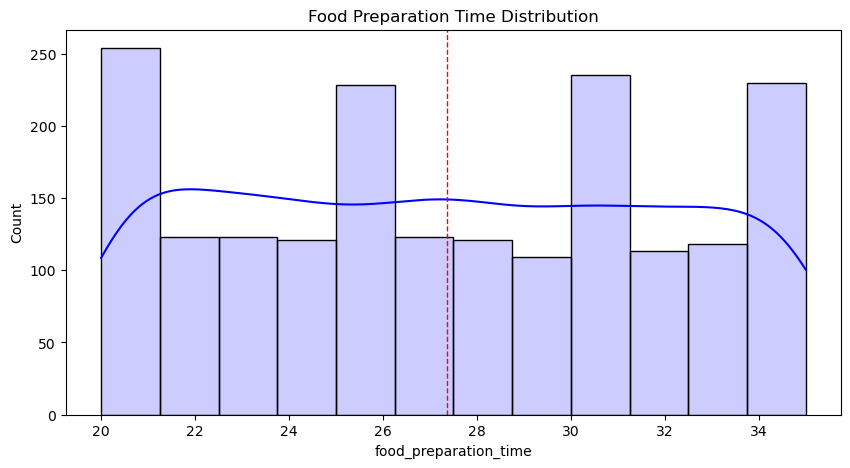

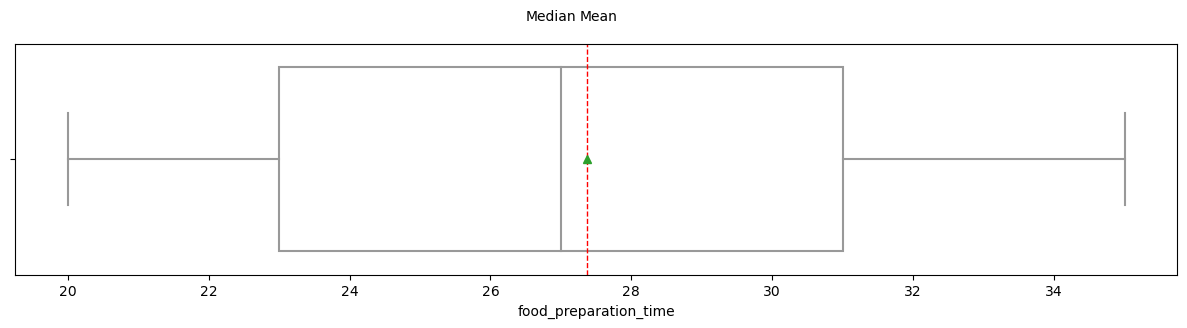

In [18]:
plt.figure(figsize = (10, 5))
sns.histplot(data = df, x = 'food_preparation_time', kde = True, color = 'blue', alpha = .2)
plt.axvline(df['food_preparation_time'].mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.title('Food Preparation Time Distribution')
plt.show()

plt.figure(figsize = (15, 3))
sns.boxplot(data = df, x = 'food_preparation_time', showmeans = True, color = 'white')
plt.axvline(df['food_preparation_time'].mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.text(x = df['food_preparation_time'].mean() - .1, y = -.6, s ='Mean')
plt.text(x = df['food_preparation_time'].median() - .5, y = -.6, s ='Median')
plt.show()

We see a multimodal distribution for Food Preparation Time, where a large number of orders fall into the range of 20-21 minutes, 25-26 minutes, 30-31 minutes, and 34-35 minutes.

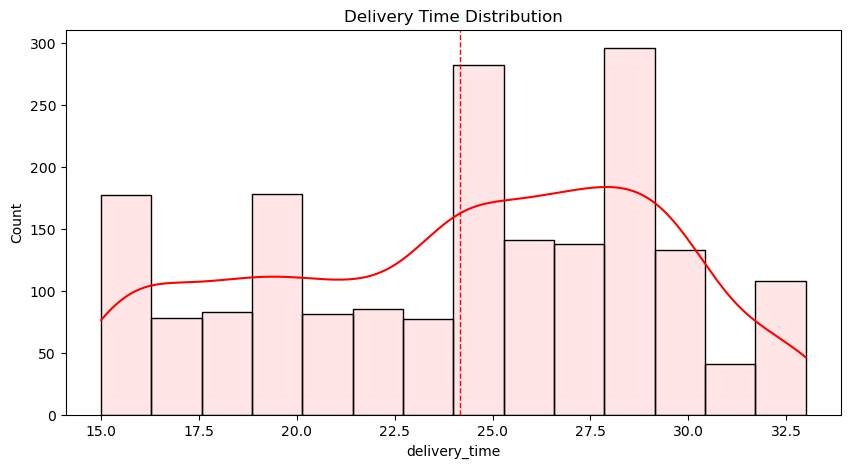

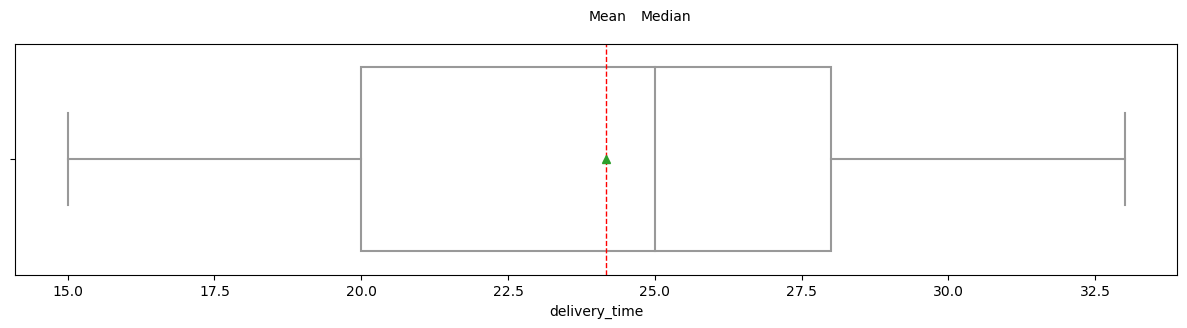

In [19]:
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'delivery_time', kde = True, color = 'red', alpha = .1)
plt.axvline(df['delivery_time'].mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.title('Delivery Time Distribution')
plt.show()

plt.figure(figsize = (15,3))
sns.boxplot(data = df, x = 'delivery_time', showmeans = True, color = 'white')
plt.axvline(df['delivery_time'].mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.text(x = df['food_preparation_time'].mean() - 3.5, y = -.6, s ='Mean')
plt.text(x = df['food_preparation_time'].median() - 2.25, y = -.6, s ='Median')
plt.show()

### Most popular restaurants

In [20]:
df.restaurant_name.value_counts(ascending = False) # orders value counts in descending order

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

The Top 5 most popular restaurants are as follows:
1. Shake Shack with 219 orders.
2. The Meatball Shop with 132 orders.
3. Blue Ribbon Sushie with 119 orders.
4. Blue Ribbon Fried Chicken with 96 orders.
5. Parm with 68 orders.


### Which is the most popular cuisine on weekends?

In [33]:
df.groupby(['cuisine_type'])['day_of_the_week'].value_counts().sort_values(ascending = False) # sorts count of day of the week in descending order by cuisine type

cuisine_type    day_of_the_week
American        Weekend            415
Japanese        Weekend            335
Italian         Weekend            207
American        Weekday            169
Chinese         Weekend            163
Japanese        Weekday            135
Italian         Weekday             91
Mexican         Weekend             53
Chinese         Weekday             52
Indian          Weekend             49
Middle Eastern  Weekend             32
Mediterranean   Weekend             32
Indian          Weekday             24
Mexican         Weekday             24
Middle Eastern  Weekday             17
Thai            Weekend             15
Mediterranean   Weekday             14
French          Weekend             13
Korean          Weekend             11
Southern        Weekend             11
Spanish         Weekend             11
Southern        Weekday              6
French          Weekday              5
Thai            Weekday              4
Vietnamese      Weekend         

The most popular cuisine on weekends is American cuisine. It is also the most popular cuisine on Weekdays.

### The company is providing 20% discount vouchers to the top 3 most frequent customers. 

In [24]:
df['customer_id'].value_counts().sort_values(ascending = False) # determines how many times each customer id appears in dataset from highest to lowest

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
335897     1
377481     1
125542     1
288808     1
397537     1
Name: customer_id, Length: 1200, dtype: int64

**Customer_id 52832** is the most frequent customer in this dataset with 13 separate orders.

**Customer_id 47440** is the second most frequent customer with 10 separate orders.

**Customer_id 83287** is the third most frequent customer with 9 separate orders.

### Multivariate Analysis

In [34]:
# descriptive statistics for numeric values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


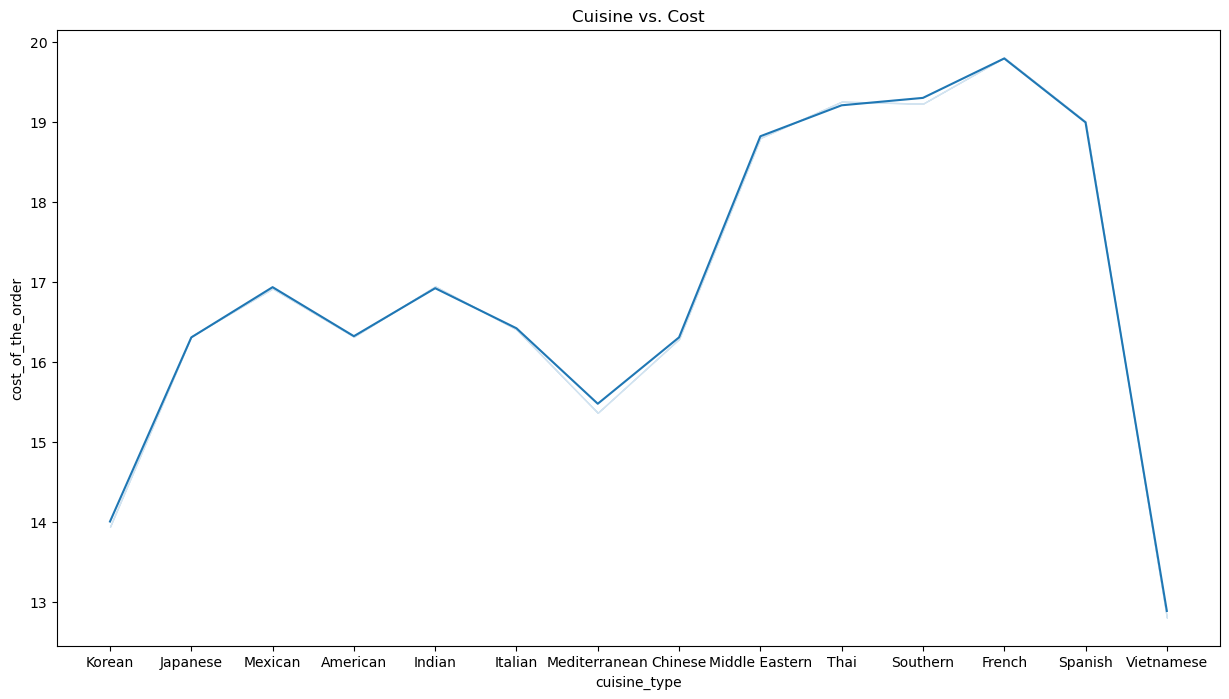

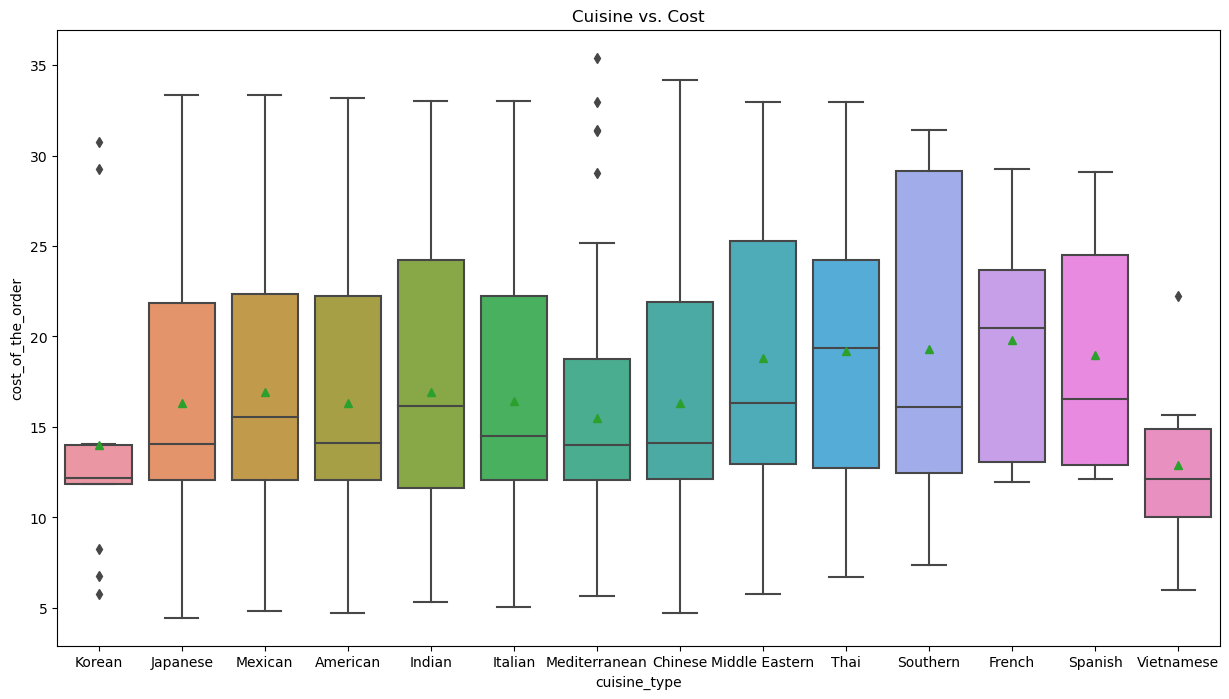

In [26]:
# Plotting lineplot to show cuisine type vs. cost trend
plt.figure(figsize = (15, 8))
sns.lineplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', ci = False) # plots lineplot without confidence interval
plt.title('Cuisine vs. Cost')
plt.show()

# Plotting boxplot to show show value ranges and 5-number summary and identify outliers
plt.figure(figsize = (15, 8))
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', showmeans = True)
plt.title('Cuisine vs. Cost')
plt.show()

We see a number of outliers for Vietnamese, Korean, and Mediterranean cuisines. Korean food has some significant outlier values skewing the mean.

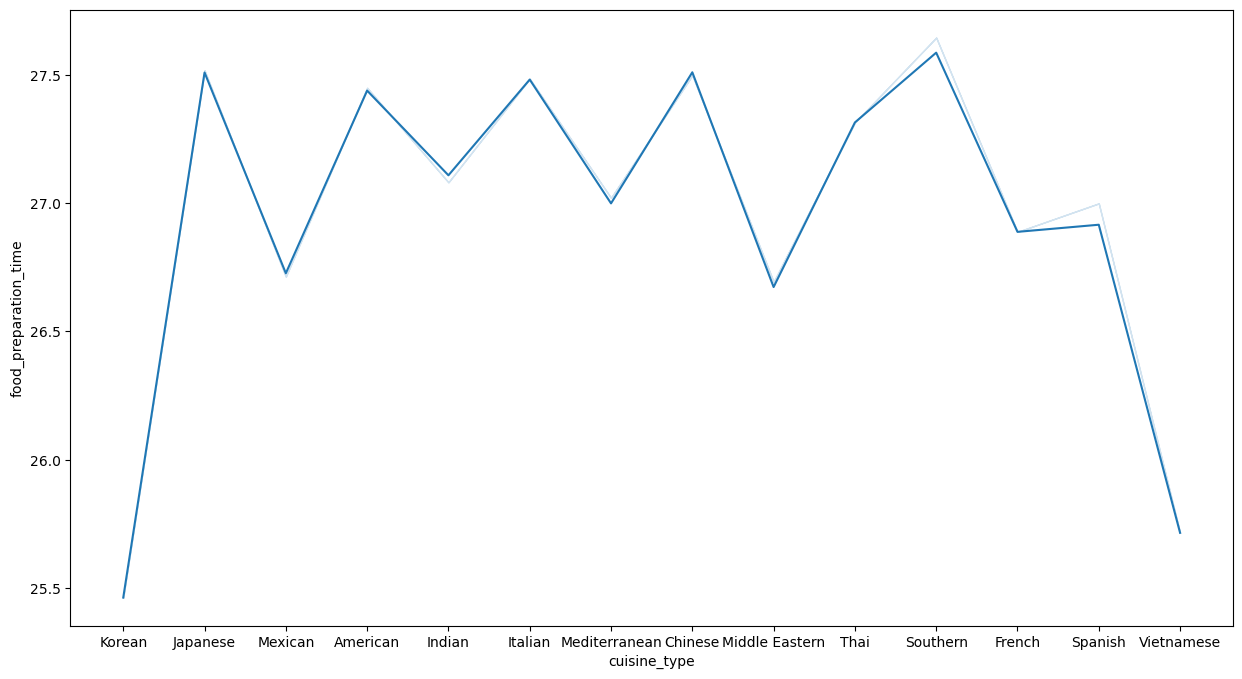

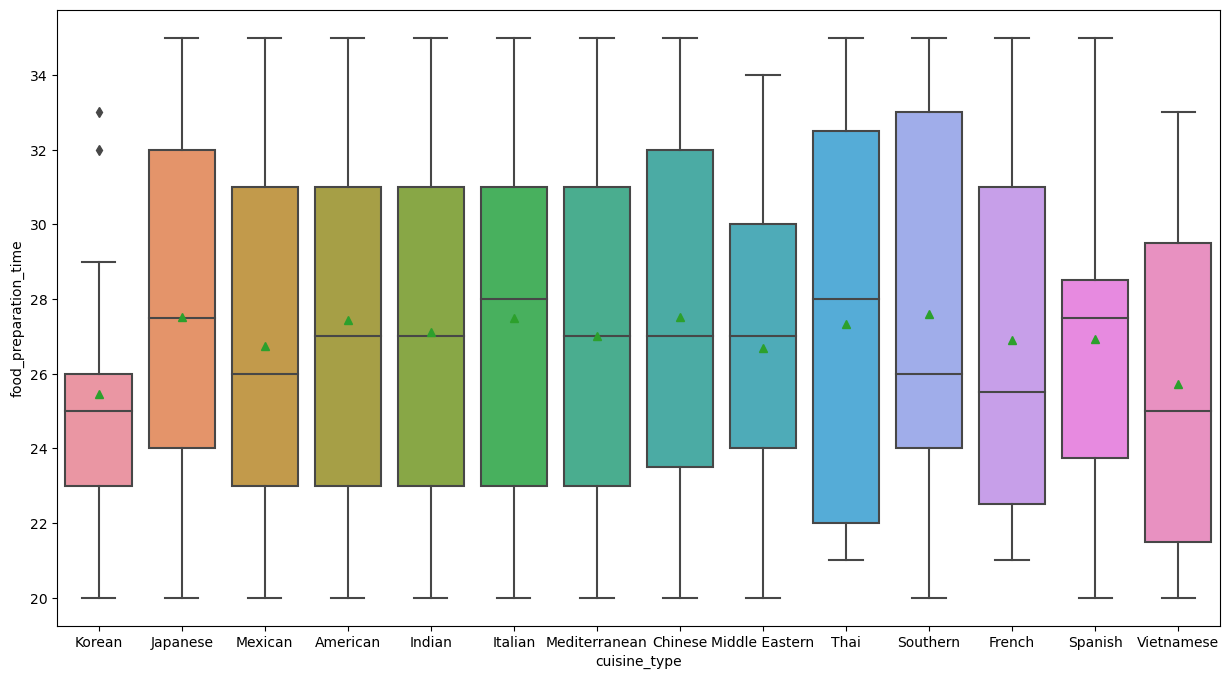

In [27]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', ci = False)
plt.show()

# Plot boxplot to show show value ranges and 5# summary
plt.figure(figsize = (15, 8))
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', showmeans = True)
plt.show()

In [28]:
# Finding the median amount of time for food prep for each cuisine type.
median = df.groupby(['cuisine_type'])['food_preparation_time'].median()
print('Median values for cuisine type based on prep time: ', median)
print('-'*50)
# Finding the mean amount of time for food prep for each cuisine type.
mean = df.groupby(['cuisine_type'])['food_preparation_time'].mean()
print('Mean values for cuisine type based on prep time: ', mean)

Median values for cuisine type based on prep time:  cuisine_type
American          27.0
Chinese           27.0
French            25.5
Indian            27.0
Italian           28.0
Japanese          27.5
Korean            25.0
Mediterranean     27.0
Mexican           26.0
Middle Eastern    27.0
Southern          26.0
Spanish           27.5
Thai              28.0
Vietnamese        25.0
Name: food_preparation_time, dtype: float64
--------------------------------------------------
Mean values for cuisine type based on prep time:  cuisine_type
American          27.440068
Chinese           27.511628
French            26.888889
Indian            27.109589
Italian           27.483221
Japanese          27.510638
Korean            25.461538
Mediterranean     27.000000
Mexican           26.727273
Middle Eastern    26.673469
Southern          27.588235
Spanish           26.916667
Thai              27.315789
Vietnamese        25.714286
Name: food_preparation_time, dtype: float64


Korean cuisine has a couple outliers. Korean and Vietnamese, on average, have the fastest food prep times, followed by French, Southern, and Mexican.
On average, Korean prep times are slightly faster but due to the outliers we will use the median values instead.

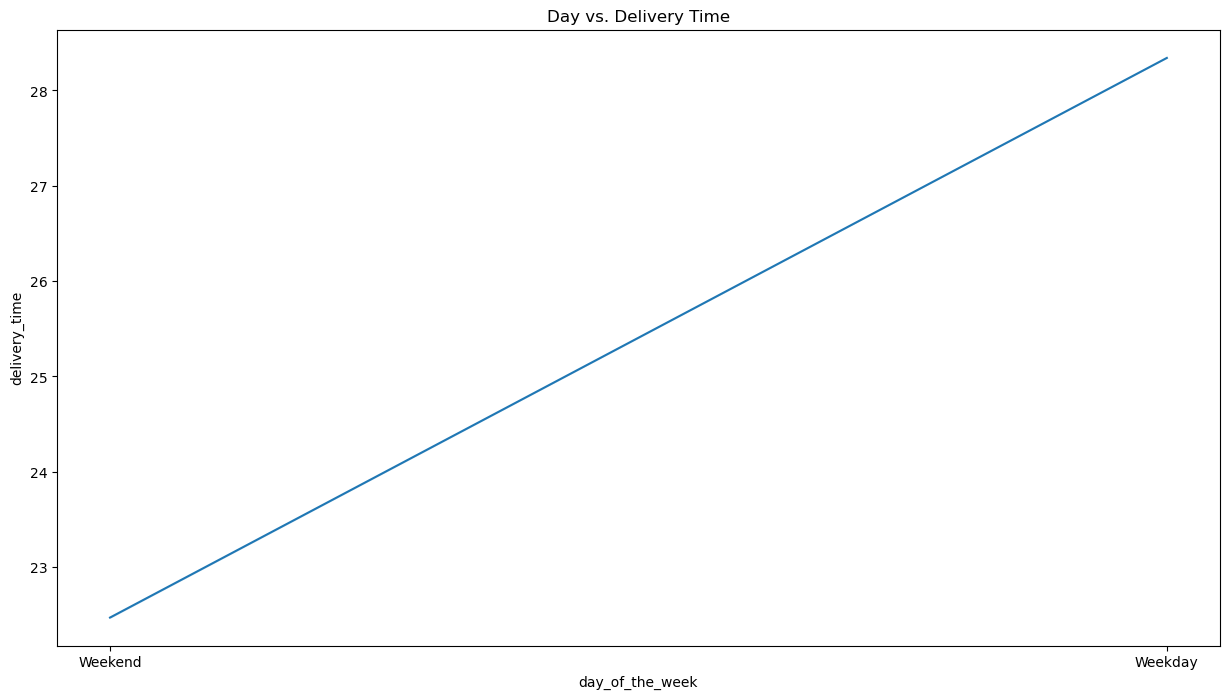

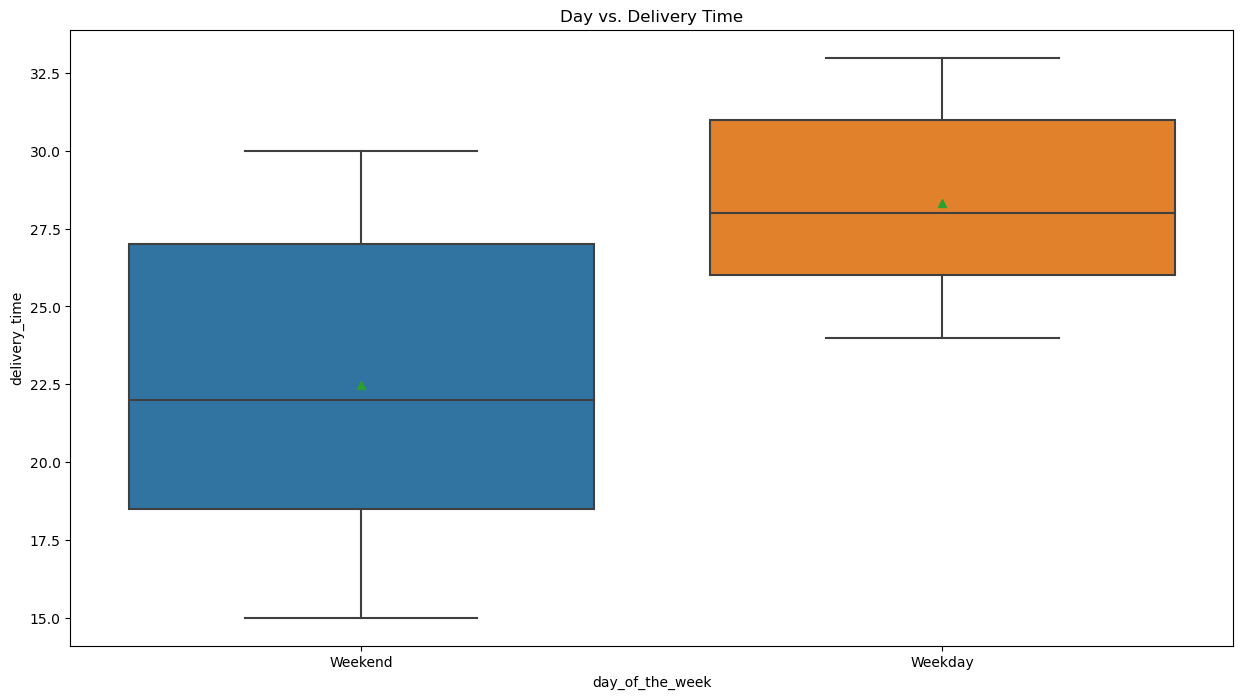

In [29]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df, x = 'day_of_the_week', y = 'delivery_time', ci = False)
plt.title('Day vs. Delivery Time')
plt.show()

plt.figure(figsize = (15, 8))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time', showmeans = True)
plt.title('Day vs. Delivery Time')
plt.show()

Weekend delivery times are faster than Weekdays on average.

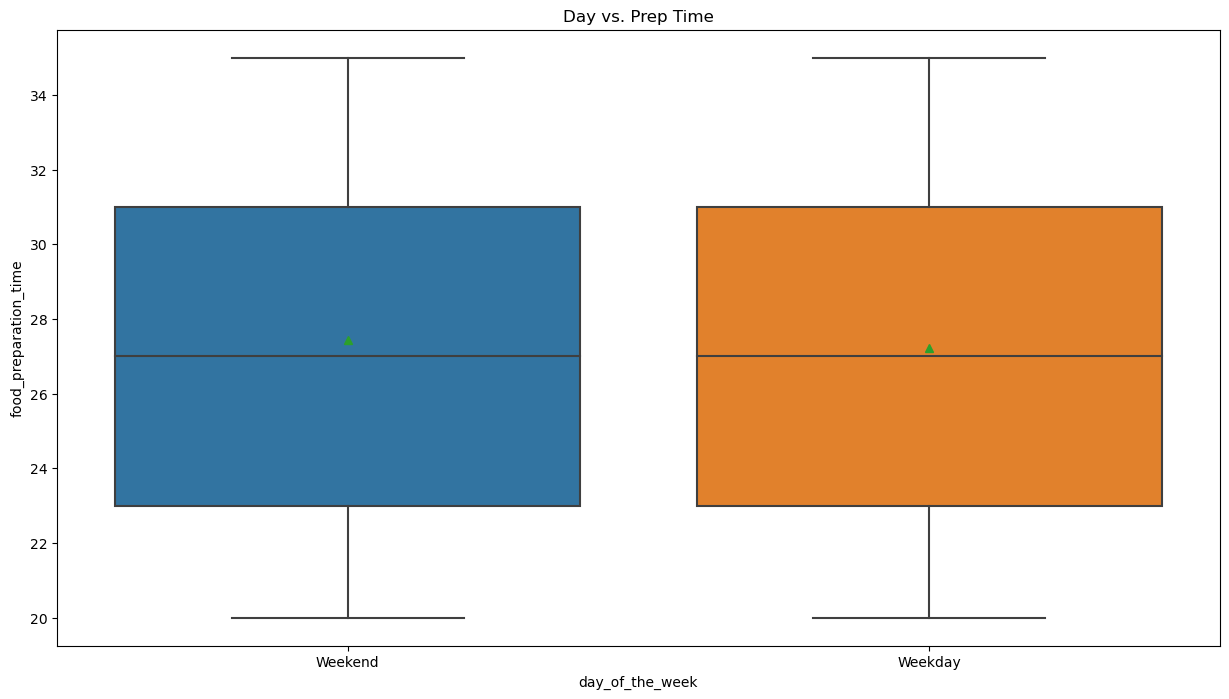

In [35]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'food_preparation_time', showmeans = True)
plt.title('Day vs. Prep Time')
plt.show()

The boxplot reveals the difference in preparation time between Weekends and Weekdays is negligible with Weekends being slightly faster on average.

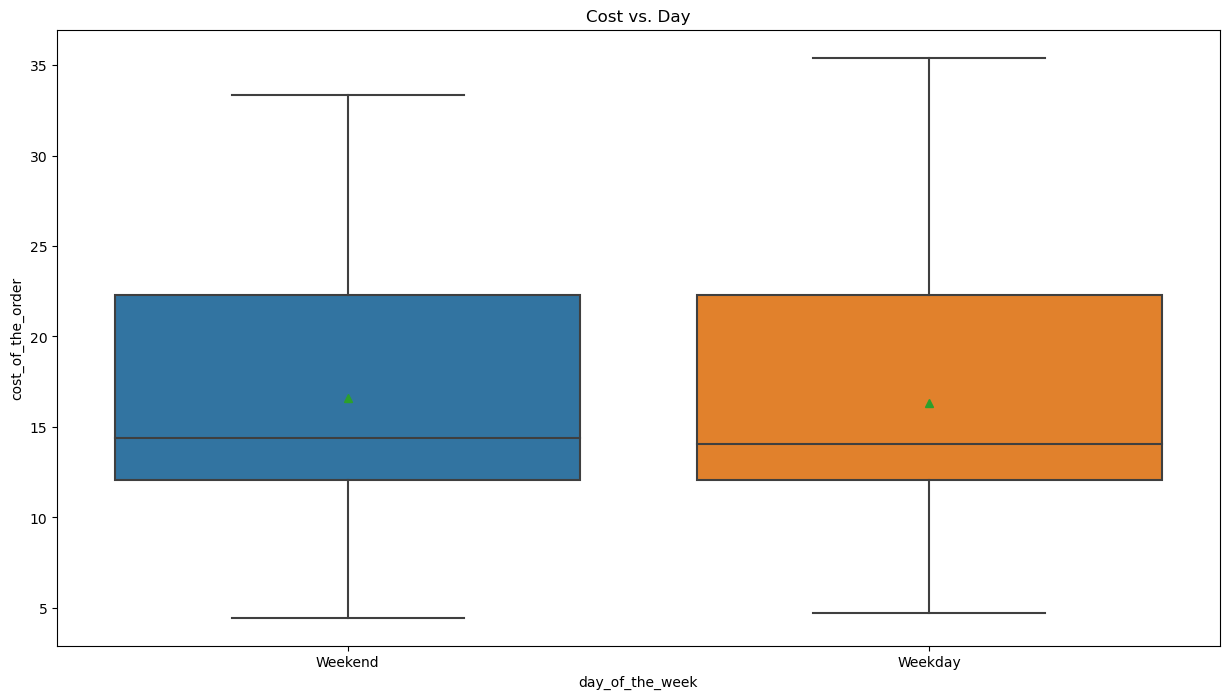

In [31]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order', showmeans = True)
plt.title('Cost vs. Day')
plt.show()

Order costs do not appear to be influenced according to Weekends/Weekdays.

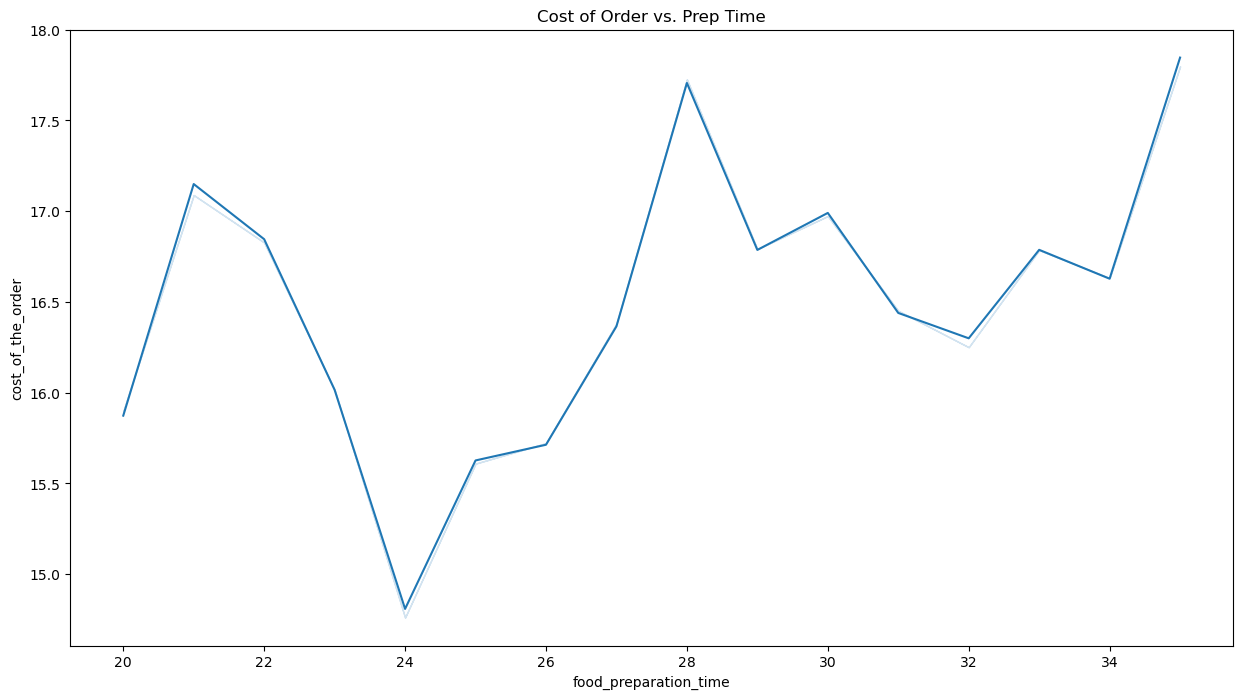

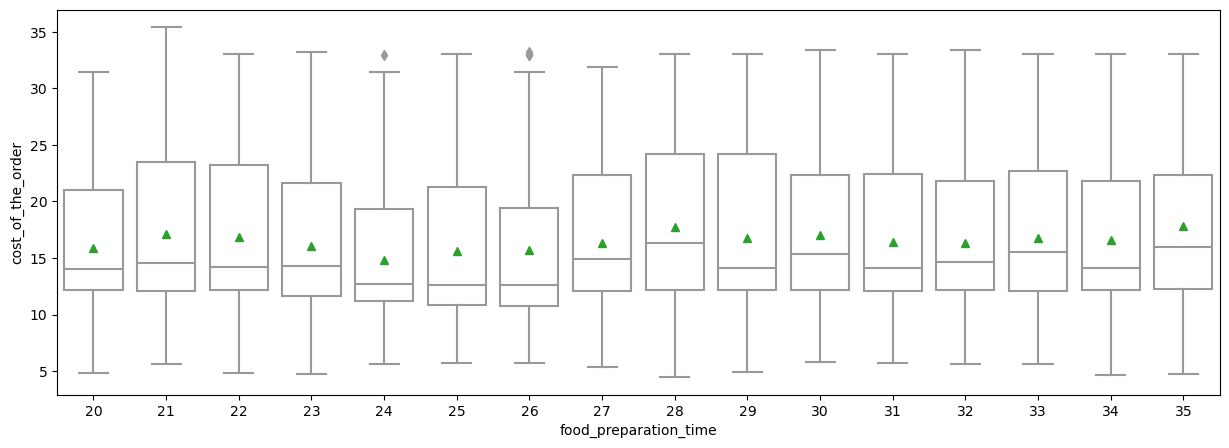

In [32]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df, x = 'food_preparation_time', y = 'cost_of_the_order',ci = False)
plt.title('Cost of Order vs. Prep Time')
plt.show()

plt.figure(figsize = (15, 5))
sns.boxplot(data = df, x = 'food_preparation_time', y = 'cost_of_the_order', color = 'white', showmeans = True)
plt.show()

There appears to be no significant correlation between food prep time and order cost. In general we can determine that higher order costs may be associated with more food items which could lead to higher prep times.

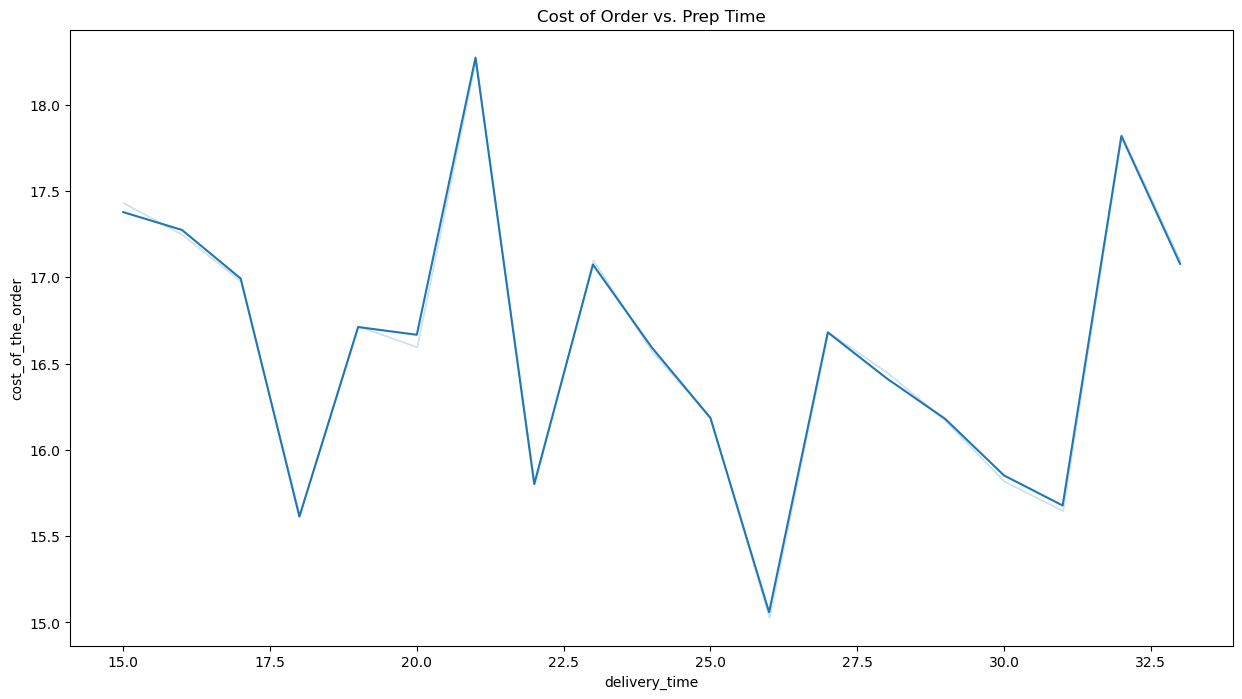

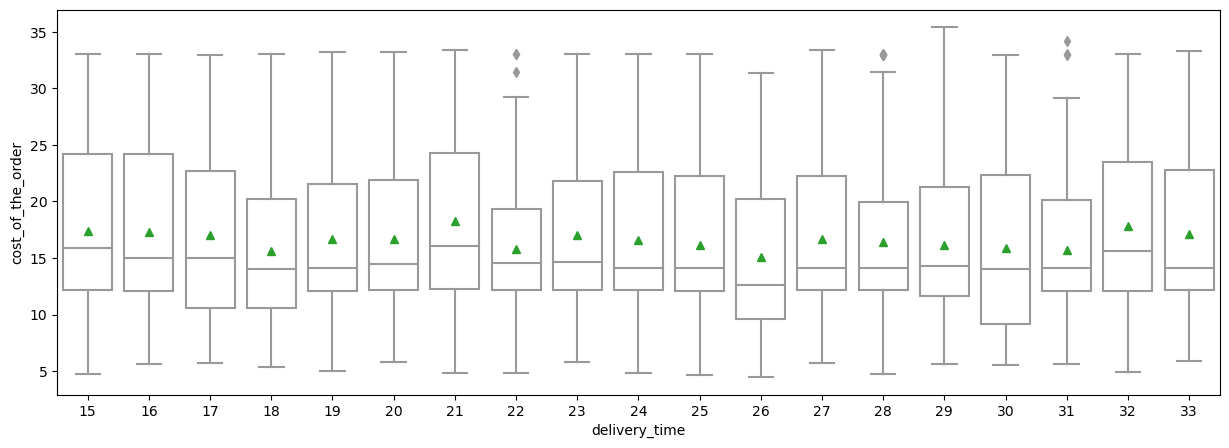

In [33]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df, x = 'delivery_time', y = 'cost_of_the_order',ci = False)
plt.title('Cost of Order vs. Prep Time')
plt.show()

plt.figure(figsize = (15, 5))
sns.boxplot(data = df, x = 'delivery_time', y = 'cost_of_the_order', color = 'white', showmeans = True)
plt.show()

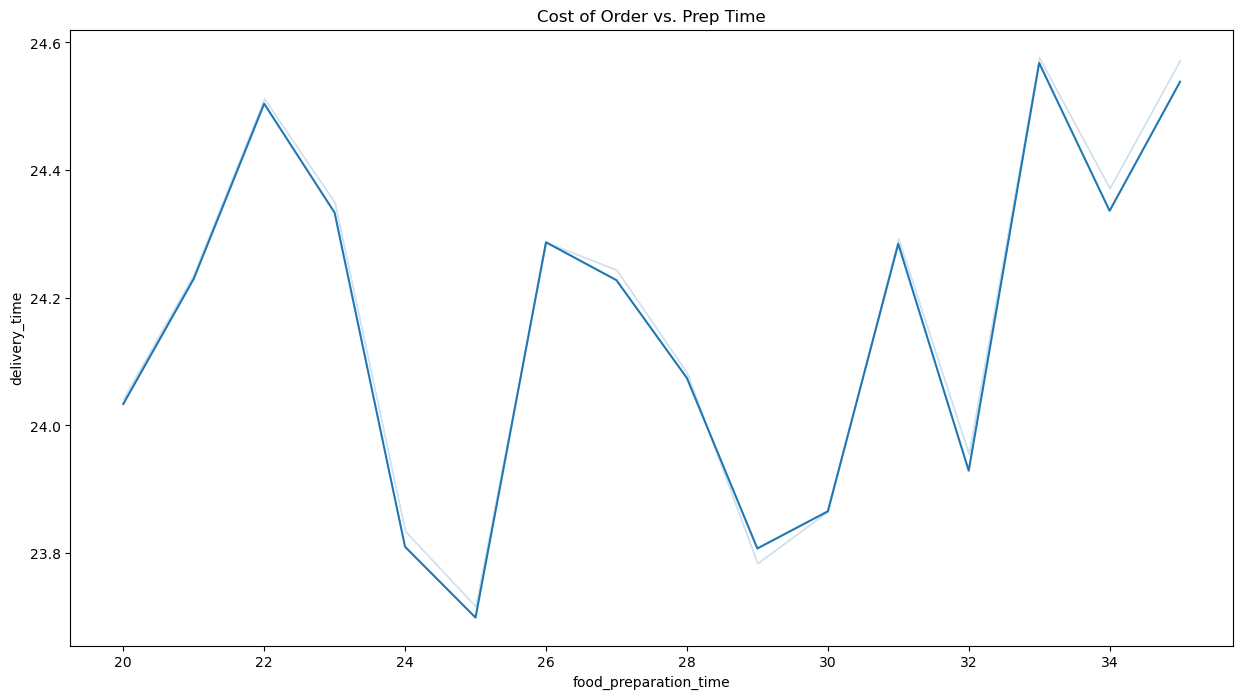

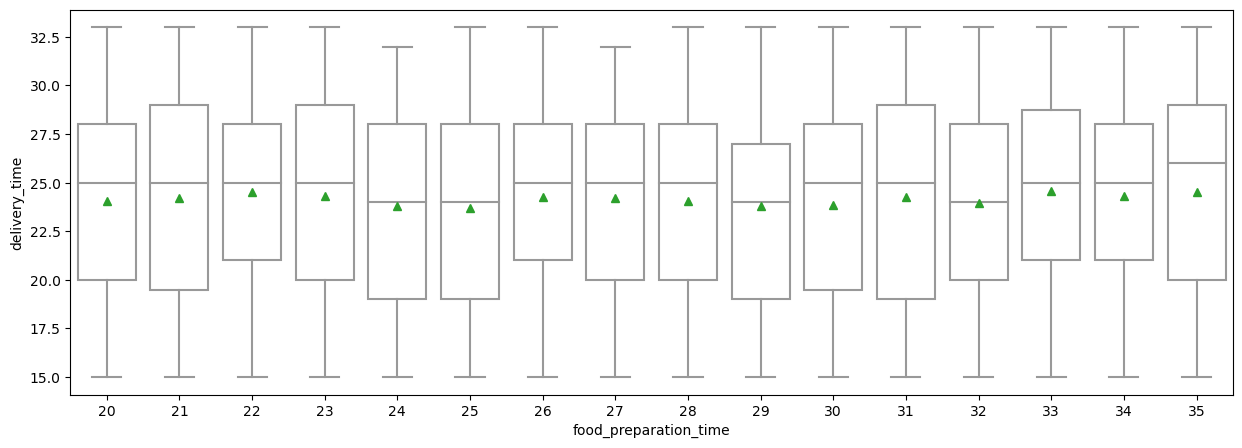

In [34]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df, x = 'food_preparation_time', y = 'delivery_time',ci = False)
plt.title('Cost of Order vs. Prep Time')
plt.show()

plt.figure(figsize = (15, 5))
sns.boxplot(data = df, x = 'food_preparation_time', y = 'delivery_time', color = 'white', showmeans = True)
plt.show()

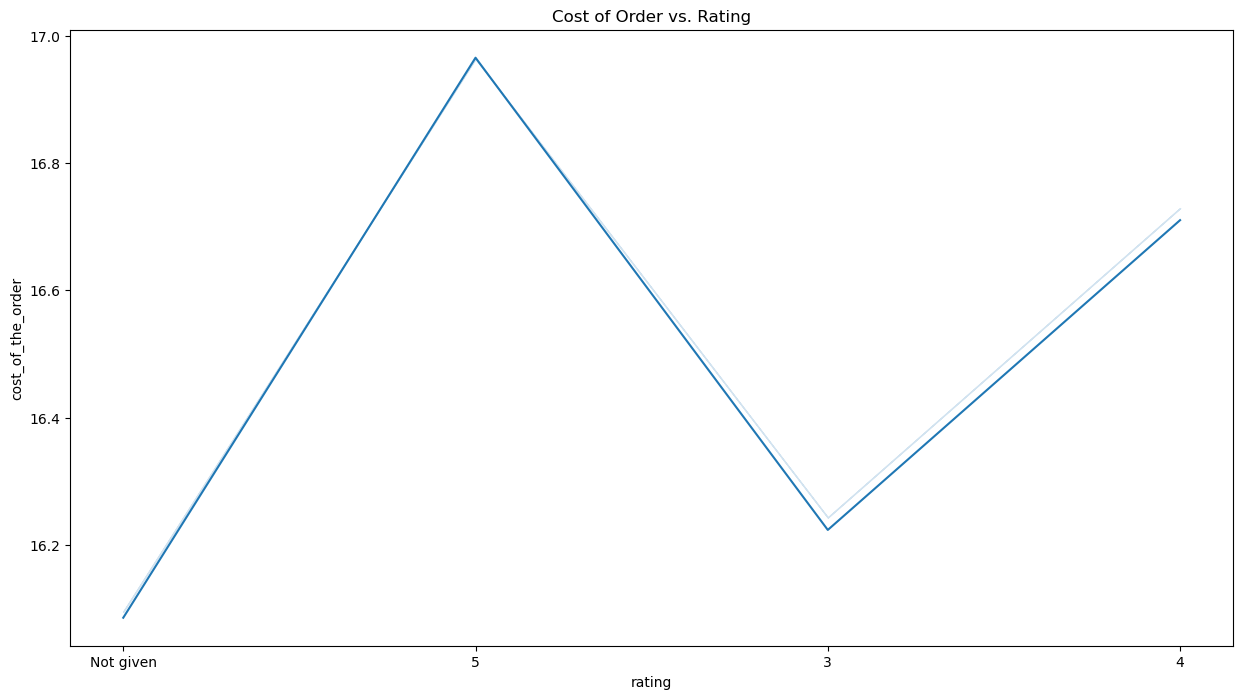

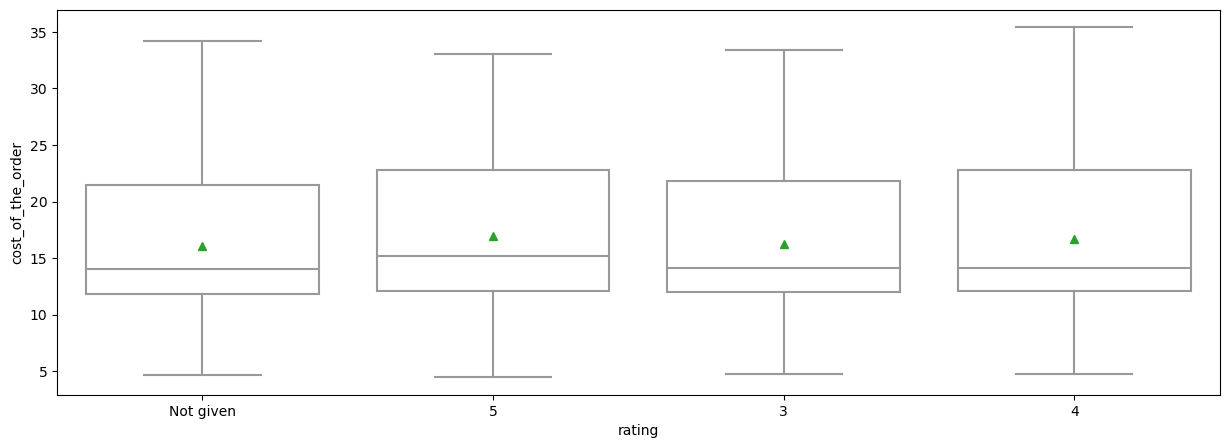

In [35]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df, x = 'rating', y = 'cost_of_the_order',ci = False)
plt.title('Cost of Order vs. Rating')
plt.show()

plt.figure(figsize = (15, 5))
sns.boxplot(data = df, x = 'rating', y = 'cost_of_the_order', color = 'white', showmeans = True)
plt.show()


### Observation:

Higher order costs are associated with higher ratings

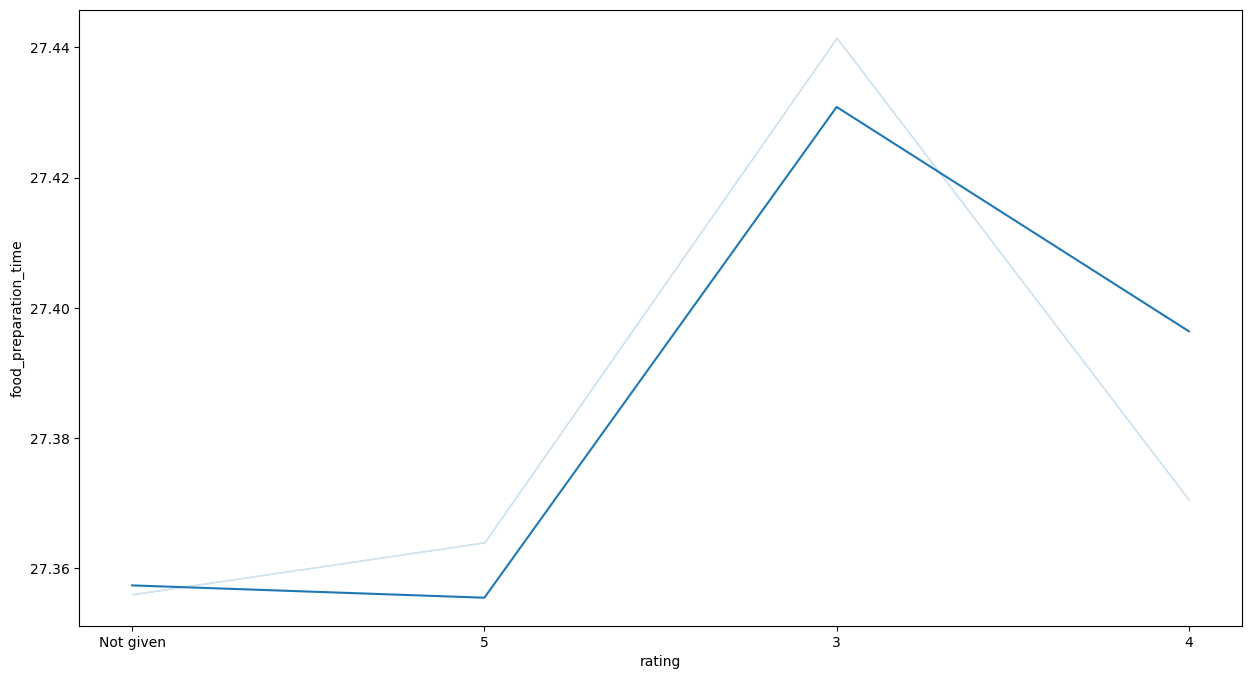

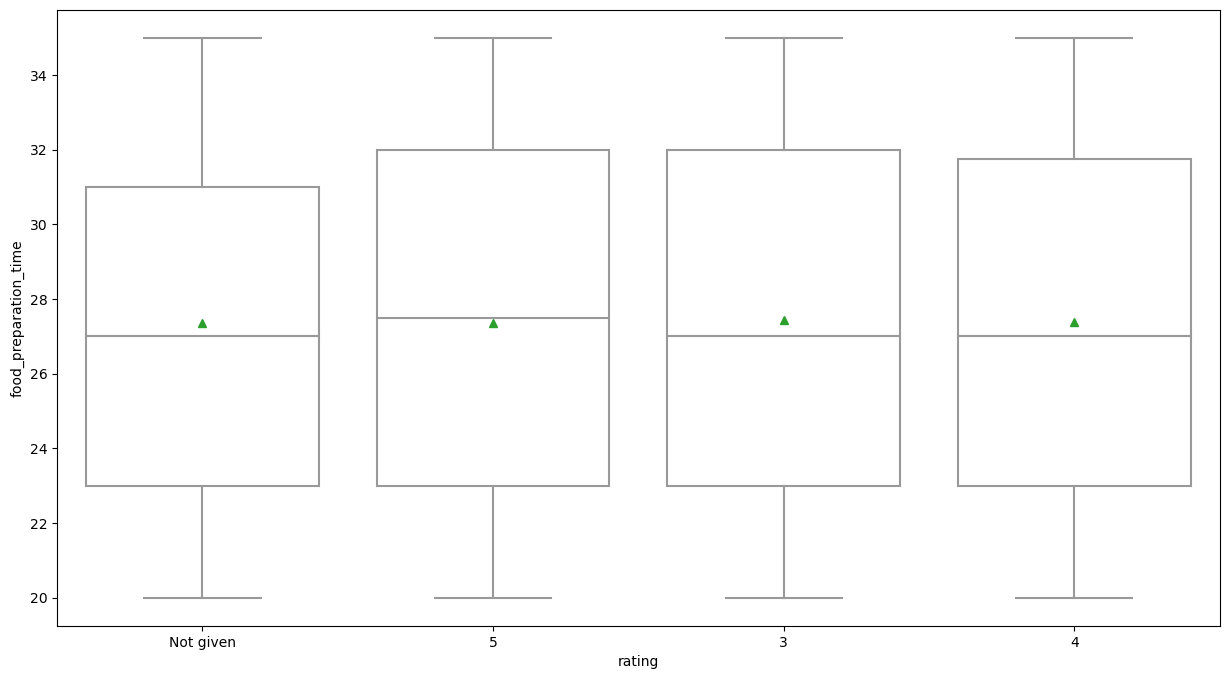

In [36]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df, x = 'rating', y = 'food_preparation_time', ci = False)
plt.show()

plt.figure(figsize = (15, 8))
sns.boxplot(data = df, x = 'rating', y = 'food_preparation_time', color = 'white',showmeans = True)
plt.show()

Faster food prep times are associated with higher ratings.

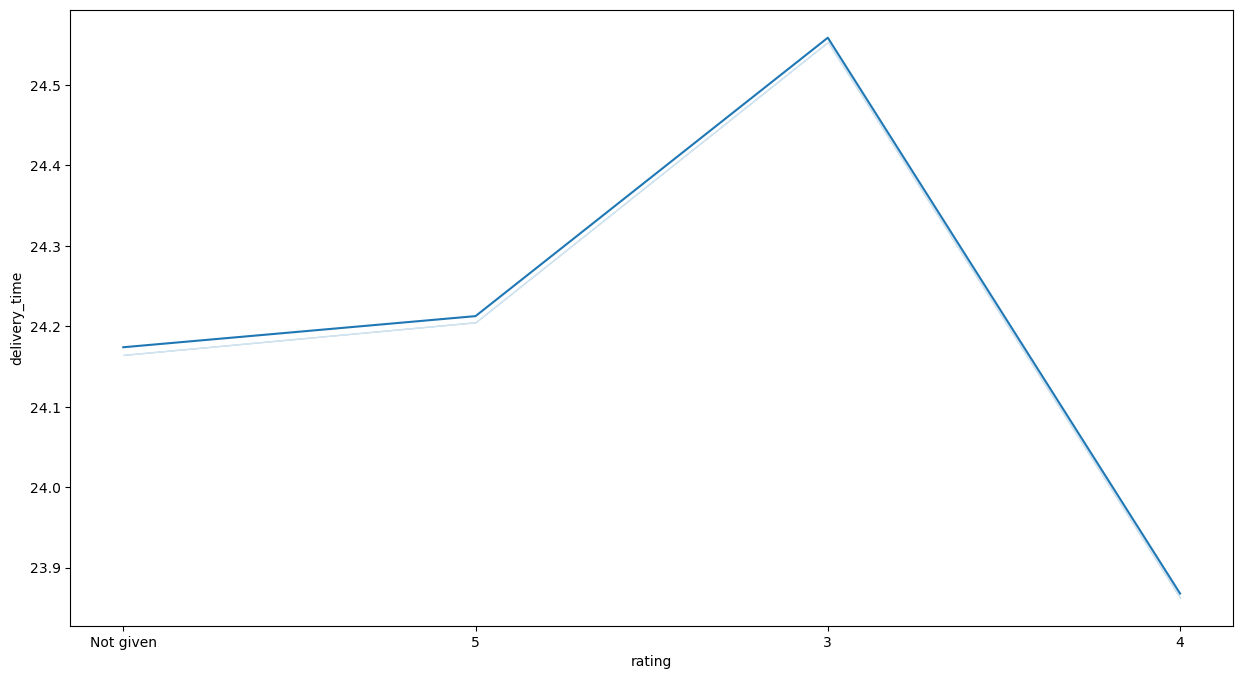

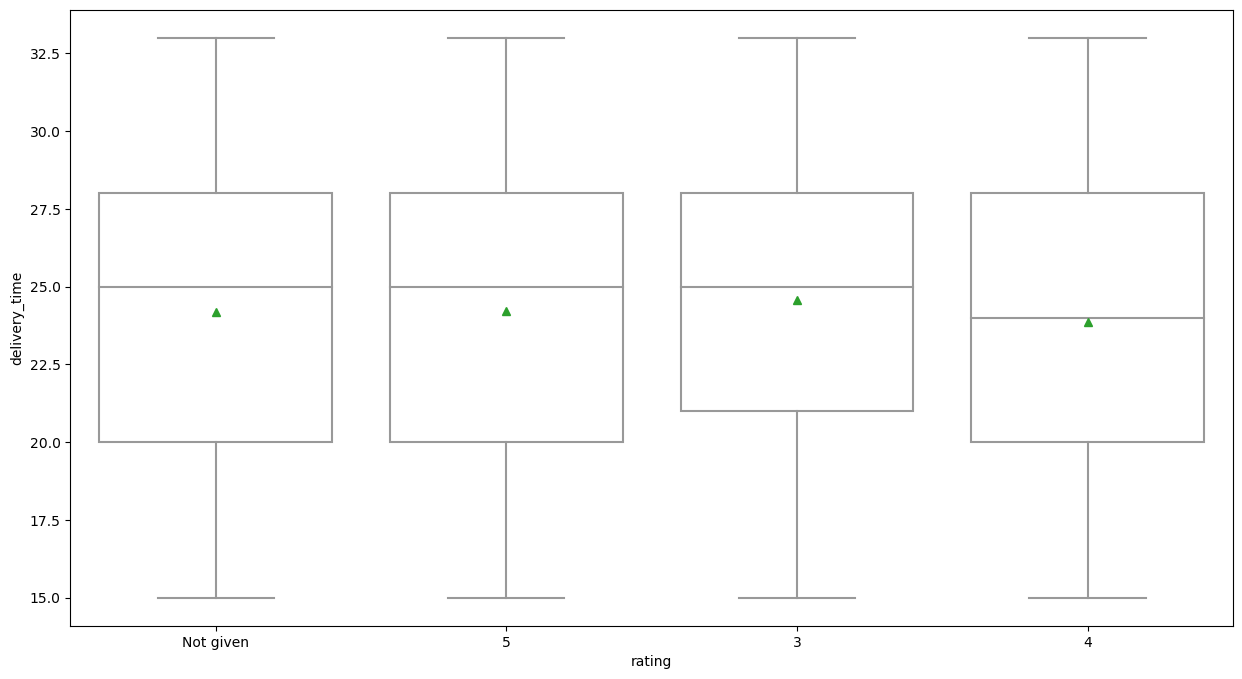

In [37]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df, x = 'rating', y = 'delivery_time', ci = False)
plt.show()

plt.figure(figsize = (15, 8))
sns.boxplot(data = df, x = 'rating', y = 'delivery_time', color = 'white',showmeans = True)
plt.show()

Faster delivery times are associated with higher ratings.

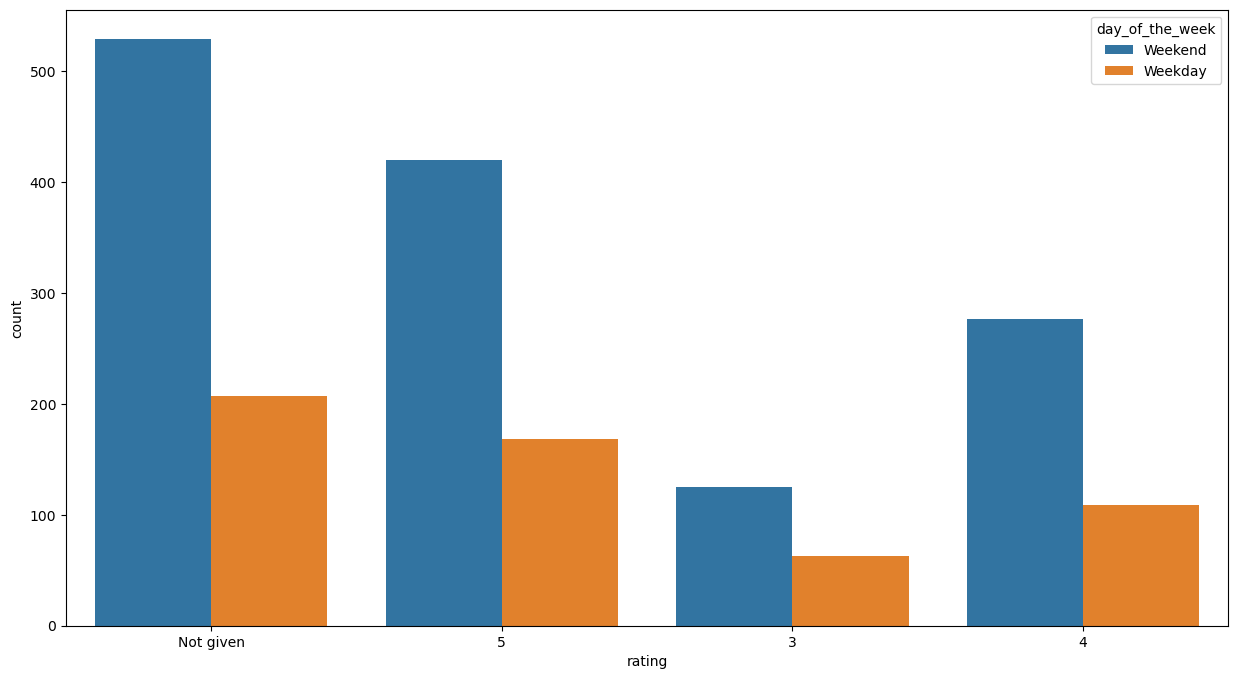

In [38]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df, x ='rating', hue = 'day_of_the_week')
plt.show()

There are more ratings on Weekends which reflects an earlier finding that ~2/3rd of orders occur on Weekends. 

In [39]:
df.corr() # creates correlation table of numeric variable

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


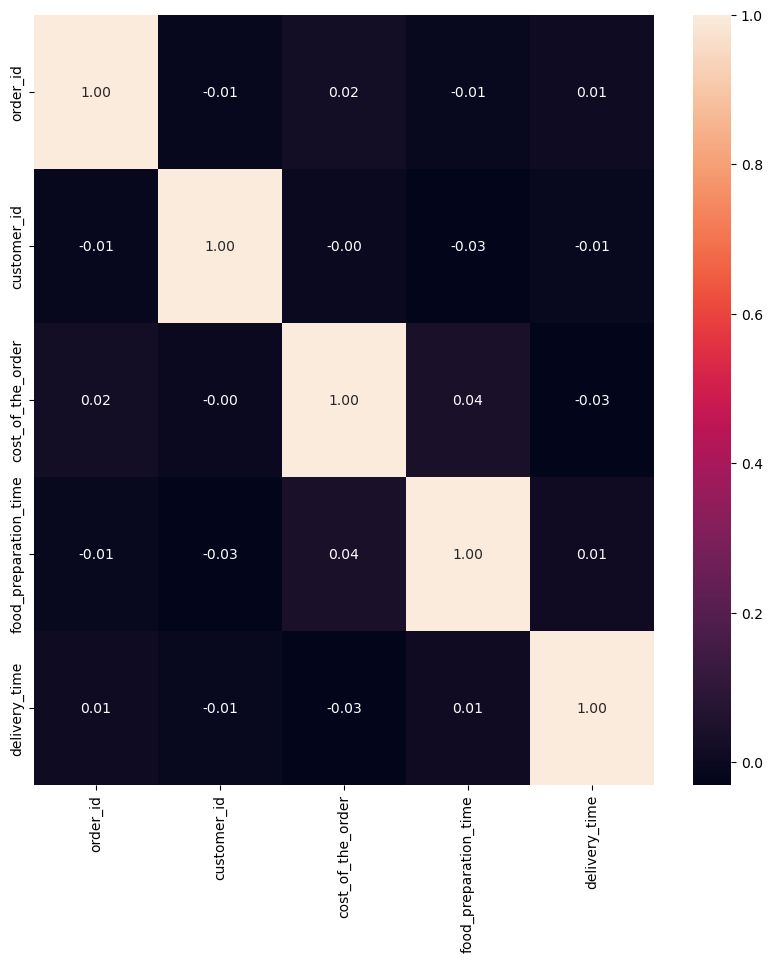

In [40]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f') # creates heatmap of correlations
plt.show()

Confirming our findings from out line/boxplots we can see there appears to be no strong correlation between any of the variables pertaining to order cost, delivery time, and prep time.

### The company is providing a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. 

In [41]:
int_rating = df[df['rating'] != 'Not given'] # creates variable including all ratings excluding 'Not given'
int_rating['rating'].astype(int) # changes the data type of remaining ratings to integers to perform later calculations
int_rating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False) # counts number of ratings given grouped by restaurant name and sorted in descending order

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
                            ... 
Frank Restaurant               1
Socarrat Paella Bar            1
El Parador Cafe                1
Lucky Strike                   1
'wichcraft                     1
Name: rating, Length: 156, dtype: int64

In [42]:
shake_shack = df[df['restaurant_name'] == 'Shake Shack'] # finds Shake Shack restaurant in column
shake_shack.groupby(['rating'])['restaurant_name'].value_counts() # returns value counts of each rating

rating     restaurant_name
3          Shake Shack        23
4          Shake Shack        50
5          Shake Shack        60
Not given  Shake Shack        86
Name: restaurant_name, dtype: int64

In [43]:
shack_prod1 = 3*23 # value of rating 3
shack_prod2 = 4*50 # value of rating 4
shack_prod3 = 5*60 # value of rating 5
shack_total = 133 # total, excluding rating of Not Given
shake_shack_avg = (shack_prod1 + shack_prod2 + shack_prod3) / shack_total # calculates average
shake_shack_avg # returns avg

4.2781954887218046

In [44]:
meatball_shop = df[df['restaurant_name'] == 'The Meatball Shop']
meatball_shop.groupby(['rating'])['restaurant_name'].value_counts()

rating     restaurant_name  
3          The Meatball Shop    10
4          The Meatball Shop    21
5          The Meatball Shop    53
Not given  The Meatball Shop    48
Name: restaurant_name, dtype: int64

In [45]:
meat_prod1 = 3*10
meat_prod2 = 4*21
meat_prod3 = 5*53
meat_total = 84
the_meatball_shop_avg = (meat_prod1 + meat_prod2 + meat_prod3)/meat_total
the_meatball_shop_avg

4.511904761904762

In [46]:
blue_ribbon = df[df['restaurant_name'] == 'Blue Ribbon Sushi']
blue_ribbon.groupby(['rating'])['restaurant_name'].value_counts()

rating     restaurant_name  
3          Blue Ribbon Sushi    16
4          Blue Ribbon Sushi    25
5          Blue Ribbon Sushi    32
Not given  Blue Ribbon Sushi    46
Name: restaurant_name, dtype: int64

In [47]:
ribbon_prod1 = 3*16
ribbon_prod2 = 4*25
ribbon_prod3 = 5*32
ribbon_total = 73
blue_ribbon_avg = (ribbon_prod1+ribbon_prod2+ribbon_prod3)/ribbon_total
blue_ribbon_avg

4.219178082191781

In [48]:
ribbon_chicken = df[df['restaurant_name'] == 'Blue Ribbon Fried Chicken']
ribbon_chicken.groupby(['rating'])['restaurant_name'].value_counts()

rating     restaurant_name          
3          Blue Ribbon Fried Chicken    11
4          Blue Ribbon Fried Chicken    21
5          Blue Ribbon Fried Chicken    32
Not given  Blue Ribbon Fried Chicken    32
Name: restaurant_name, dtype: int64

In [49]:
chicken_prod1 = 3*11
chicken_prod2 = 4*21
chicken_prod3 = 5*32
chicken_total = 64
chicken_avg = (chicken_prod1+chicken_prod2+chicken_prod3)/chicken_total
chicken_avg

4.328125

In [50]:
print('Shake Shack has an average rating of: ',round(shake_shack_avg, 2))
print('The Meatball Shop has an average rating of: ',round(the_meatball_shop_avg, 2))
print('Blue Ribbon Sushi has an average rating of: ',round(blue_ribbon_avg, 2))
print('Blue Ribbon Fried Chicken has an average rating of: ',round(chicken_avg, 2))

Shake Shack has an average rating of:  4.28
The Meatball Shop has an average rating of:  4.51
Blue Ribbon Sushi has an average rating of:  4.22
Blue Ribbon Fried Chicken has an average rating of:  4.33


Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken are the restaurants fulfilling the criteria to receive a promotional offer.

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. We will determine the net revenue generated by the company across all orders.

In [51]:
# Using loc to access values in the column > 20 and multiply them by .25
greater_20 = df.loc[df['cost_of_the_order']>20, 'cost_of_the_order'] *.25
# Using loc to access the values in the column > 5 and < 20 and multiply them by .15
greater_5 = df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order']< 20),'cost_of_the_order']*.15       
revenue = greater_20.sum() + greater_5.sum()                  

print('The total net revenue generated by the company is: $', round(revenue,2))

The total net revenue generated by the company is: $ 6166.3


The net revenue generated from orders over 5 dollars in this dataset is $6166.30.

### What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [52]:
over_60 = df.loc[(df['food_preparation_time'] + df['delivery_time']) > 60] # adds values from the 2 columns and creates of variable of results over 60
per_over60 = (over_60.value_counts().sum()/1898) * 100 # calculate percentage
print('The percentage of orders taking longer than 60 minutes is: ',round(per_over60,2),'%.')

The percentage of orders taking longer than 60 minutes is:  10.54 %.


10.54% of all orders take longer than 60 minutes.

### How does the mean delivery time vary during weekdays and weekends?

In [53]:
df.groupby(['day_of_the_week'])['delivery_time'].mean() # finds mean delivery time based on day of the week

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

The mean delivery time on Weekdays is 28.34 minutes.
The mean delivery time on Weekends is 22.47 minutes.

### Conclusion and Recommendations

### Conclusions:
*  The 4 most popular cuisine types are:
1. American
2. Japanese
3. Italian
4. Chinese
*  Delivery & food prep times can lead to higher ratings.
*  Weekends are more popular and, consequently, more profitable.
*  Deliveries on weekends, on average, are quicker.

### Recommendations:

*  Increase number of available delivery drivers on weekends.
*  Provide promotions for American, Japanese, Italian, & Chinese restaurants for orders over a certain amount throughout the week.
*  Provide promotions over a certain order amount to restaurants with average ratings over 4 during the weekend.
*  Collect further data to determine most popular times of the day and variables like traffic trends to determine what affects delivery times.
*  Collect further data on ratings.
*  Further rating data can be collected by incentivizing users to provide a rating, instead of failing to do so.

---